# Cirrhosis Patient Survival Prediction

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import other libraries if needed
from sklearn.model_selection import train_test_split

## Import Dataset

In [ ]:
# Write your code here
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
df_train.shape

(15000, 20)

In [ ]:
df_test.shape

(10000, 19)

In [ ]:
# Write your code here
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8450 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8453 non-null   object 
 6   Hepatomegaly   8448 non-null   object 
 7   Spiders        8441 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6626 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8340 non-null   float64
 13  Alk_Phos       8444 non-null   float64
 14  SGOT           8441 non-null   float64
 15  Tryglicerides  6575 non-null   float64
 16  Platelets      14416 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         9999 non-null   float64
 2   Drug           5632 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5635 non-null   object 
 6   Hepatomegaly   5628 non-null   object 
 7   Spiders        5627 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4375 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5560 non-null   float64
 13  Alk_Phos       5626 non-null   float64
 14  SGOT           5626 non-null   float64
 15  Tryglicerides  4343 non-null   float64
 16  Platelets      9610 non-null   float64
 17  Prothrombin    9990 non-null   float64
 18  Stage  

In [ ]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6626.000000,15000.000000,8340.000000,8444.000000,8441.000000,6575.000000,14416.000000,14984.000000,15000.000000
mean,7499.500000,1969.116920,19298.427133,1.862907,322.805916,3.520585,76.395725,1676.897656,108.214094,110.670418,254.266294,10.624837,3.014733
std,4330.271354,1374.093322,3706.122475,2.763713,163.041117,0.373807,76.662546,1882.904216,152.099011,49.828478,96.081587,0.729726,0.887113
min,0.000000,10.800000,174.000000,0.300000,120.000000,1.960000,0.900000,3.410000,0.900000,11.000000,0.900000,4.160000,1.000000
25%,3749.750000,1092.000000,16463.000000,0.700000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,189.000000,10.100000,2.000000
50%,7499.500000,1783.000000,19577.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000,3.000000
75%,11249.250000,2615.000000,22388.000000,1.800000,360.000000,3.770000,89.000000,1689.000000,130.200000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,25976.000000,91894.000000,28.000000,1790.000000,4.700000,604.000000,18102.000000,12285.000000,608.000000,3150.000000,18.000000,4.000000


In [ ]:
print("df train")
print(df_train.isnull().sum())
print("df test")
print(df_test.isnull().sum())

df train
id                  0
N_Days              0
Drug             6550
Age                 0
Sex                 0
Ascites          6547
Hepatomegaly     6552
Spiders          6559
Edema               0
Bilirubin           0
Cholesterol      8374
Albumin             0
Copper           6660
Alk_Phos         6556
SGOT             6559
Tryglicerides    8425
Platelets         584
Prothrombin        16
Stage               0
Status              0
dtype: int64
df test
id                  0
N_Days              1
Drug             4368
Age                 0
Sex                 0
Ascites          4365
Hepatomegaly     4372
Spiders          4373
Edema               0
Bilirubin           0
Cholesterol      5625
Albumin             0
Copper           4440
Alk_Phos         4374
SGOT             4374
Tryglicerides    5657
Platelets         390
Prothrombin        10
Stage               0
dtype: int64


In [ ]:
df_train[df_train.duplicated()]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [ ]:
list_cat = list(df_train.select_dtypes(include=['object']))

for i in list_cat:
    print(i)
    print(df_train[i].value_counts())
list_cat_test = list(df_test.select_dtypes(include=['object']))
for i in list_cat_test:
    print(df_test[i].value_counts)

Drug
Drug
D-penicillamine    4515
Placebo            3935
Name: count, dtype: int64
Sex
Sex
F    14405
M      595
Name: count, dtype: int64
Ascites
Ascites
N    8027
Y     426
Name: count, dtype: int64
Hepatomegaly
Hepatomegaly
N        4652
Y        3795
158.0       1
Name: count, dtype: int64
Spiders
Spiders
N    6598
Y    1843
Name: count, dtype: int64
Edema
Edema
N    13874
S      737
Y      389
Name: count, dtype: int64
Status
Status
C     10117
D      4525
CL      358
Name: count, dtype: int64
<bound method IndexOpsMixin.value_counts of 0       Placebo
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
9995    Placebo
9996    Placebo
9997        NaN
9998    Placebo
9999        NaN
Name: Drug, Length: 10000, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       F
1       F
2       F
3       F
4       F
       ..
9995    F
9996    F
9997    F
9998    F
9999    F
Name: Sex, Length: 10000, dtype: object>
<bound method IndexOpsMixin.value_coun

In [ ]:
df_train['Status'].value_counts(normalize = True)

,proportion
Status,
C,0.674467
D,0.301667
CL,0.023867


## visualization to help

### numerical data

In [ ]:
list_num = list(df_train.select_dtypes(include=['int64', 'float64']))

In [ ]:
def vis_dist(features):
  num_features = len(features)
  columns = 6
  rows = (num_features + columns - 1) // columns
  fig, axes = plt.subplots(rows, columns, figsize=(20, rows * 5))
  axes = axes.flatten()

  for i, feature in enumerate(features):
      sns.histplot(data=df_train, x=feature, ax=axes[i], kde=True)
      axes[i].set_title(f'Distribution of {feature}')


  for j in range(num_features, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

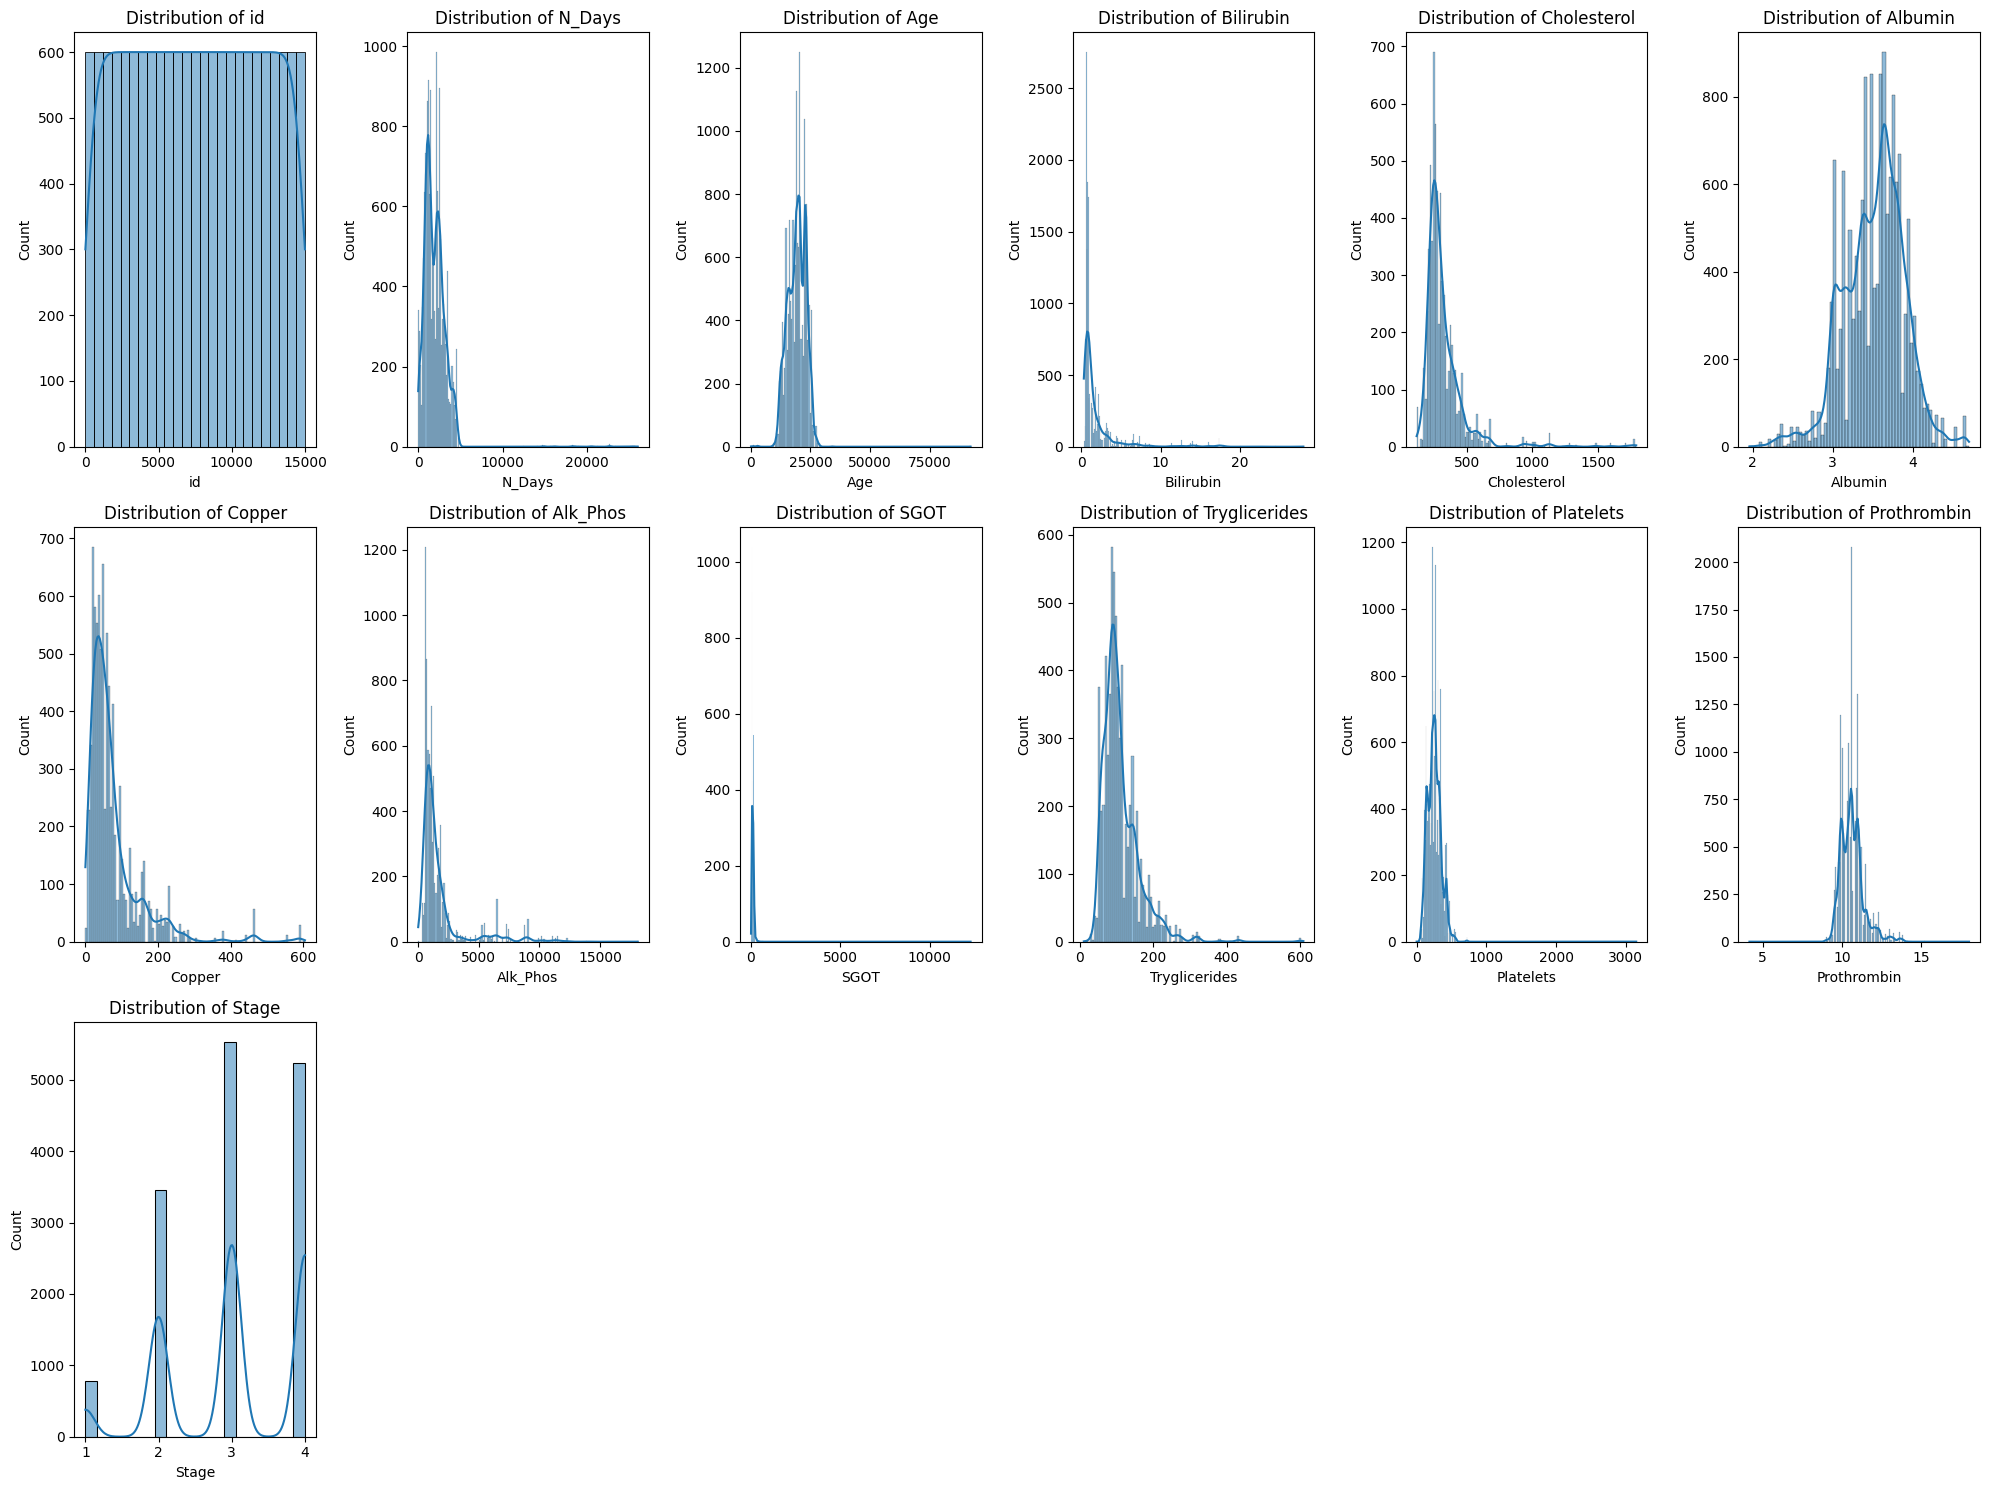

In [ ]:
vis_dist(list_num)

In [ ]:
df_train["N_Days"].value_counts()

,count
N_Days,
2149.0,171
2537.0,159
778.0,142
597.0,141
1236.0,130
...,...
1167.0,1
27.0,1
1353.0,1


In [ ]:
df_train["Stage"].value_counts()

,count
Stage,
3.0,5530
4.0,5235
2.0,3456
1.0,779


In [ ]:
df_train["SGOT"].value_counts()

,count
SGOT,
57.35,404
71.30,355
97.65,301
128.65,251
137.95,232
...,...
601.00,1
166.40,1
107.00,1


In [ ]:
df_train["Cholesterol"].value_counts()

,count
Cholesterol,
263.0,156
232.0,148
248.0,140
298.0,126
280.0,126
...,...
179.0,1
474.0,1
1070.0,1


<Axes: >

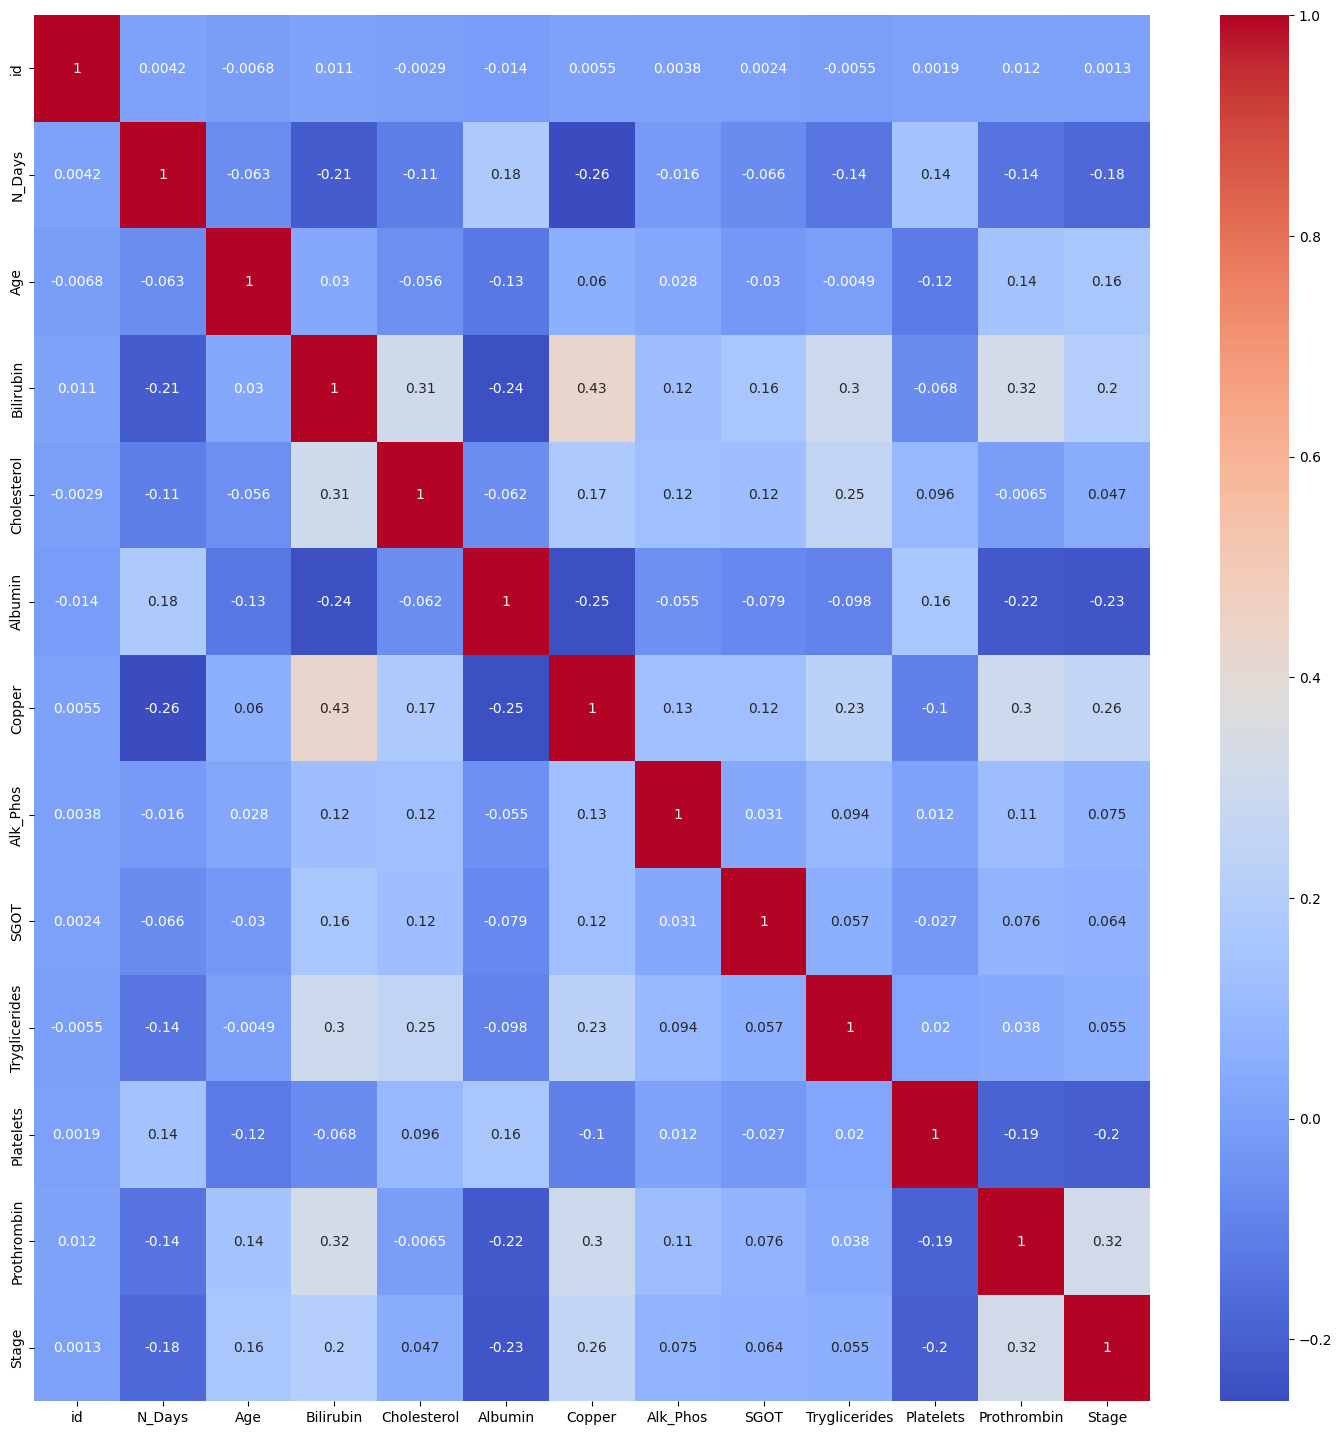

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train[list_num].corr(), annot=True,cmap = "coolwarm" )

#### Bivariate analysis

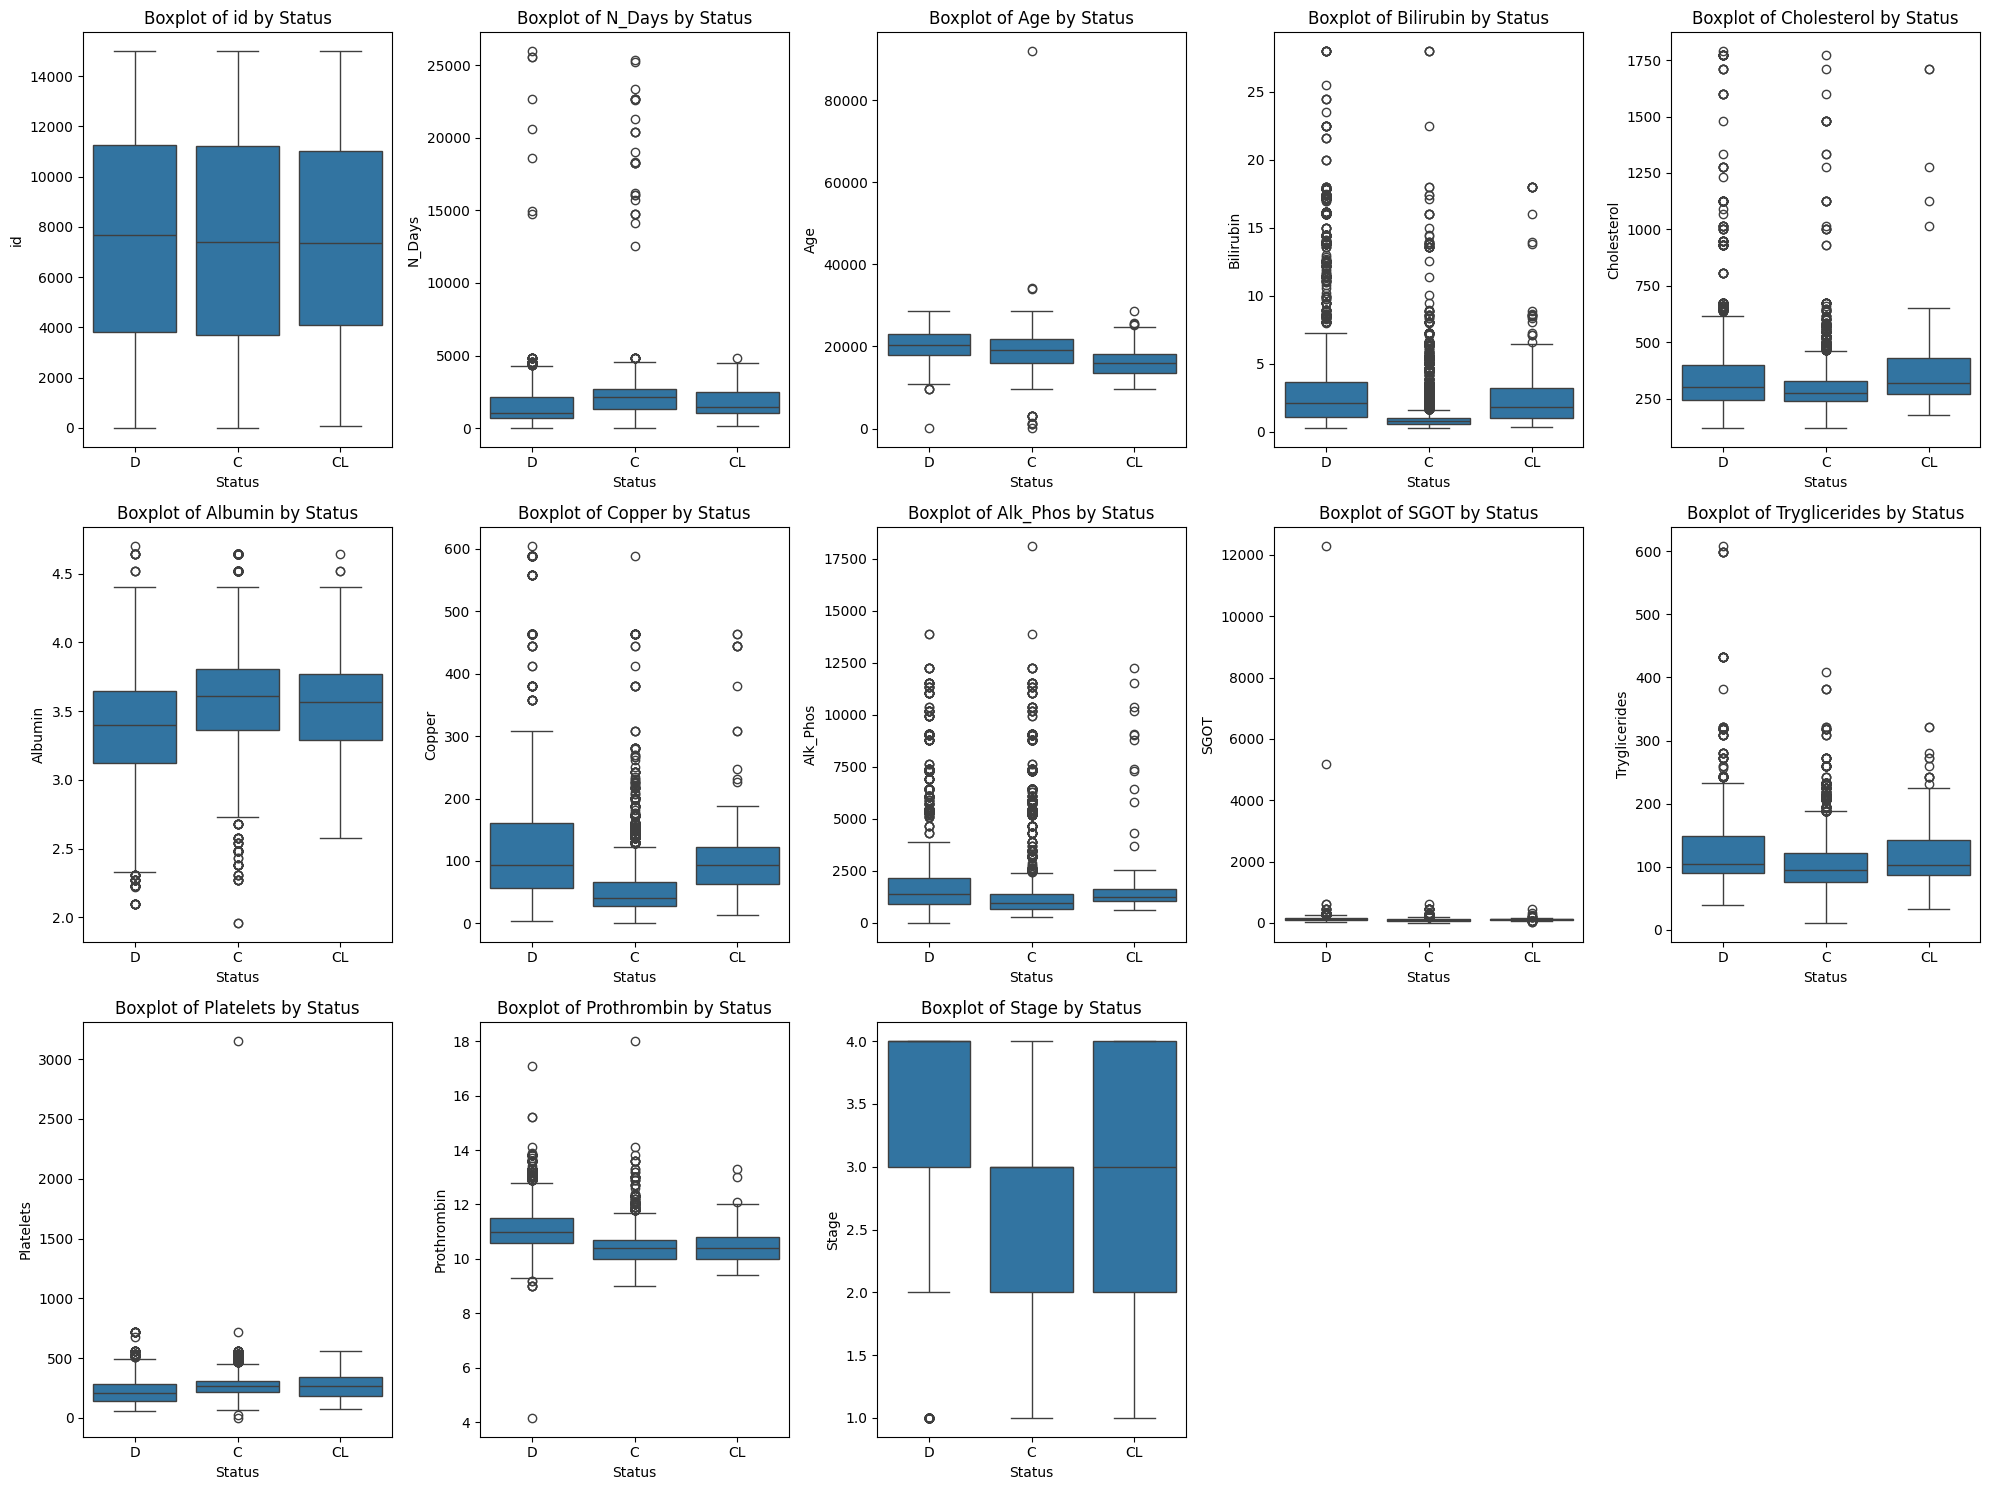

In [ ]:
features_per_row = 5

# Loop untuk visualisasi
features = list_num  # Ganti numerical_cols dengan daftar kolom numerik Anda
num_features = len(features)
rows = (num_features + features_per_row - 1) // features_per_row  # Hitung jumlah baris

fig, axes = plt.subplots(rows, features_per_row, figsize=(20, rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='Status', y=feature, data=df_train, ax=axes[i])  # Ganti 'status' dengan nama kolom kategorikal Anda
    axes[i].set_title(f"Boxplot of {feature} by Status")

# Hapus subplot kosong
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Categorical Data

In [ ]:
list_cat = list(df_train.select_dtypes(include=['object']))

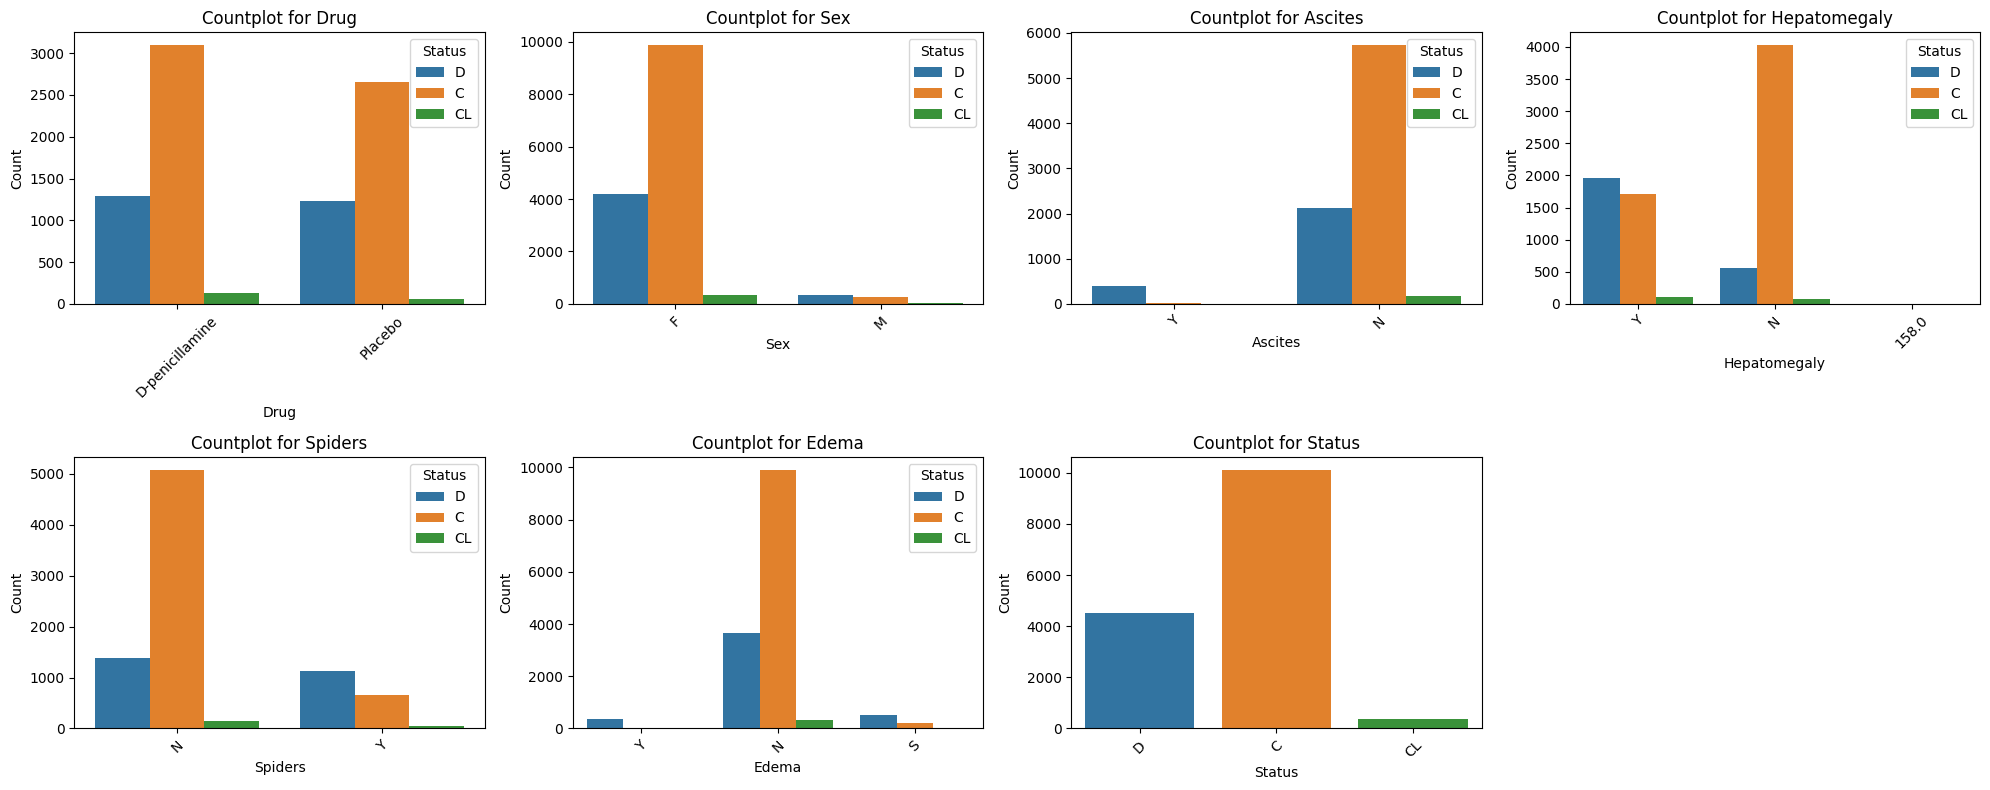

In [ ]:
n_cols = 4
n_rows = (len(list_cat) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(list_cat):
    sns.countplot(data=df_train, x=col, hue='Status', ax=axes[i])
    axes[i].set_title(f'Countplot for {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)


for j in range(len(list_cat), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df_train["Status"].value_counts(normalize = True)

,proportion
Status,
C,0.674467
D,0.301667
CL,0.023867


# Insight Obtained:
1. Most of the data consists of float or numeric types.
2. There are many null values in both the training and test datasets.
3. An anomaly was found in the hepatomegaly feature, where the value is 158.0.
4. The Copper feature tends to have a low median value in patients with status C.
5. Copper has a relatively strong relationship with bilirubin.
6. The data indicates that females are more likely to suffer from the disease.
7. The class with status C is dominant.

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.


due to there is anomali, therefore i should drop it first

In [ ]:
# Write your code here
df_train.drop(df_train[df_train['Hepatomegaly'] == "158.0"].index, inplace=True)

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
train_set, val_set = train_test_split(df_train, test_size=0.2, random_state=42)

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

# 3. Compile Preprocessing Pipeline

*   imputer

*   encoder




All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [ ]:


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_train['Status'])
X = df_train.drop(['Status','id'], axis=1)
X_test = df_test.drop(['id'], axis=1)


numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Pipeline for numeric columns
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
# # Pipeline for categorical columns
# categorical_pipeline1 = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
# ])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
# ColumnTransformer to combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)


The reason I used **SimpleImputer** with the median strategy for missing values in numerical data is that the median is not affected by outliers.  
An **encoder** was utilized to transform non-numerical data into numerical form, making it understandable for machine learning algorithms. For imputing missing values in categorical data, I used the **fill_constant** technique, filling missing values with the label `'missing'`. This approach aligns with the models I intend to use, namely **XGBoost** and **CatBoost**, as they are robust to missing values. Additionally, the high number of missing values in categorical data, combined with the suspicion that some features are genuinely missing or inherently absent, supports this approach.  

# 4. Modeling and Validation (submission included)

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the probability for each class in the `Status` feature (`Status_C`, `Status_CL`, `Status_D`). Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## KNN

In [ ]:
# Type your code here

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Split train and validation data
X_train = train_set.drop(['Status', 'id'], axis=1)  # Drop 'id' and 'Status'
y_train = train_set['Status']
X_val = val_set.drop(['Status', 'id'], axis=1)      # Drop 'id' and 'Status'
y_val = val_set['Status']

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert target to numeric
y_val = label_encoder.transform(y_val)          # Apply the same encoding to validation data

# Define models

model_knn = KNeighborsClassifier(n_neighbors=500)
pipeline_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_knn)
    ])
pipeline_knn.fit(X_train, y_train)
y_val_pred = pipeline_knn.predict_proba(X_val)
knn_log_loss = log_loss(y_val, y_val_pred)
print(f"Log Loss(val set): {knn_log_loss:.4f}")

# Train and validate each model



Log Loss(val set): 0.6149


val loss = 0.6149

In [ ]:

y_test_pred_knn = pipeline_knn.predict_proba(X_test)


submission_knn = pd.DataFrame(y_test_pred_knn, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission_knn.insert(0, 'id', df_test['id'])
submission_filename_knn = "submission_knn.csv"
submission_knn.to_csv(submission_filename_knn, index=False)
print(f"KNN Submission file saved as {submission_filename_knn}.")


KNN Submission file saved as submission_knn.csv.


## Naive Bayes

In [ ]:
# Type your code here
pipeline_NB = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])
pipeline_NB.fit(X_train, y_train)
y_val_pred = pipeline_NB.predict_proba(X_val)
val_log_loss = log_loss(y_val, y_val_pred)
print(f"Log Loss(val set): {val_log_loss:.4f}")

Log Loss(val set): 1.4765


val loss = 1.4765

In [ ]:
y_test_pred_nb = pipeline_NB.predict_proba(X_test)

# Buat file submission
submission_nb = pd.DataFrame(y_test_pred_nb, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission_nb.insert(0, 'id', df_test['id'])
submission_filename_nb = "submission_naive_bayes.csv"
submission_nb.to_csv(submission_filename_nb, index=False)
print(f"Gaussian Naive Bayes Submission file saved as {submission_filename_nb}.")

Gaussian Naive Bayes Submission file saved as submission_naive_bayes.csv.


## ID3

In [ ]:
from sklearn.metrics import log_loss  # Pastikan fungsi log_loss diimpor

# Pipeline untuk DecisionTreeClassifier
pipeline_dtl = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Gunakan preprocessor sebelumnya
    ('classifier', DecisionTreeClassifier(criterion="entropy"))  # Model Decision Tree
])

# Fit pipeline pada training data
pipeline_dtl.fit(X_train, y_train)

# Prediksi probabilitas pada validation set
y_val_pred = pipeline_dtl.predict_proba(X_val)

# Hitung log loss pada validation set
val_log_loss = log_loss(y_val, y_val_pred)
print(f"Log Loss (Validation Set): {val_log_loss:.4f}")


Log Loss (Validation Set): 7.7974


val loss = 7.7974

In [ ]:
y_test_pred_dtl = pipeline_dtl.predict_proba(X_test)

# Create submission file
submission_dtl = pd.DataFrame(y_test_pred_dtl, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission_dtl.insert(0, 'id', df_test['id'])
submission_filename_dtl = "submission_ID3.csv"
submission_dtl.to_csv(submission_filename_dtl, index=False)
print(f"Decision Tree Submission file saved as {submission_filename_dtl}.")

Decision Tree Submission file saved as submission_ID3.csv.


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


print("Training Logistic Regression...")
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Gunakan preprocessor sebelumnya
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))  # Logistic Regression
])

# Fit pipeline pada training data
pipeline_lr.fit(X_train, y_train)

# Prediksi probabilitas pada validation set
y_val_pred_lr = pipeline_lr.predict_proba(X_val)

# Hitung log loss pada validation set
lr_log_loss = log_loss(y_val, y_val_pred_lr)
print(f"Logistic Regression Log Loss (Validation Set): {lr_log_loss:.4f}")

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Log Loss (Validation Set): 0.5453


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


val_loss = 0.543

In [ ]:
# Prediksi probabilitas pada test set
y_test_pred_lr = pipeline_lr.predict_proba(df_test.drop(['id'], axis=1))

submission_lr = pd.DataFrame(y_test_pred_lr, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission_lr.insert(0, 'id', df_test['id'])
submission_filename_lr = "submission_logistic_regression.csv"
submission_lr.to_csv(submission_filename_lr, index=False)
print(f"Logistic Regression Submission file saved as {submission_filename_lr}.")


Logistic Regression Submission file saved as submission_logistic_regression.csv.


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

# === Support Vector Machine Model ===
print("Training Support Vector Machine...")
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Gunakan preprocessor sebelumnya
    ('classifier', SVC(probability=True, kernel='rbf', C=1.0))  # SVM dengan
])

X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]
pipeline_svm.fit(X_train_subset, y_train_subset)

# Prediksi probabilitas pada validation set
y_val_pred_svm = pipeline_svm.predict_proba(X_val)


svm_log_loss = log_loss(y_val, y_val_pred_svm)
print(f"SVM Log Loss (Validation Set): {svm_log_loss:.4f}")

Training Support Vector Machine...
SVM Log Loss (Validation Set): 0.6871


Val loss  = 0.6871

In [ ]:
y_test_pred_svm = pipeline_svm.predict_proba(df_test.drop(['id'], axis=1))

# Buat file submission
submission_svm = pd.DataFrame(y_test_pred_svm, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission_svm.insert(0, 'id', df_test['id'])
submission_filename_svm = "submission_svm.csv"
submission_svm.to_csv(submission_filename_svm, index=False)
print(f"SVM Submission file saved as {submission_filename_svm}.")

SVM Submission file saved as submission_svm.csv.


## Notes for improvements

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

- **Ensemble methods**

Ensemble methods are powerful machine learning techniques that combine the predictions of multiple models (often referred to as base learners or weak learners) to create a stronger, more accurate predictive model. The idea behind ensemble methods is that by aggregating the opinions of multiple models, you can reduce the impact of individual model errors and improve overall prediction performance. (Hint: bagging, boosting, stacking, voting)

- **Model interpretation**

Model interpretation is the process of understanding and explaining the inner workings of a machine learning model, particularly its decision-making process. Interpretation helps data scientists, stakeholders, and end-users gain insights into why a model makes certain predictions or classifications. Model interpretation is crucial for building trust in machine learning systems, identifying biases, and extracting actionable information from models. (Hint: Feature importance, PDP, SHAP Values, etc)

- **Explore other models**

There are a lot of ML models that you can use in this usecase. Try to explore and use them to solve this problem.

## Catboost (submission included, Tuned)

Hyperparameter saya dapatkan ketika tuning dengan optuna (kode tidak saya masukan)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.2 MB/s eta 0:00:00


In [ ]:
# Hyperparameter hasil tuning
catboost_params = {
    "iterations": 2000,
    "learning_rate": 0.05350631002808884,
    "depth": 5,
    "l2_leaf_reg": 5.626205228313551,
    "border_count": 82,
    "loss_function": "MultiClass",
    "eval_metric": "MultiClass",
    "task_type": "GPU",
    "verbose": 200
}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Tangani nilai missing untuk fitur kategorikal dan numerik
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Isi missing value untuk kategorikal
X[categorical_cols] = X[categorical_cols].fillna('missing')
df_test_features = df_test.drop('id', axis=1)
df_test_features[categorical_cols] = df_test_features[categorical_cols].fillna('missing')

# Konversi kolom numerik ke tipe numerik (mengatasi error string pada numerik)
for col in numerical_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    df_test_features[col] = pd.to_numeric(df_test_features[col], errors='coerce')

# Definisikan indeks fitur kategorikal
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Parameter awal untuk CatBoost
base_params = catboost_params

# Cross-validation untuk mencari model terbaik
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
best_fold_model = None
best_fold_logloss = float('inf')

print("Performing cross-validation...")
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}...")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


    fold_model = CatBoostClassifier(**base_params)
    fold_model.fit(
        X_train, y_train,
        cat_features=categorical_indices,
        eval_set=(X_val, y_val),
        early_stopping_rounds=50,
        verbose=200
    )

    # Prediksi probabilitas dan log loss
    y_val_pred = fold_model.predict_proba(X_val)
    fold_logloss = log_loss(y_val, y_val_pred)
    cv_results.append((fold, fold_logloss, fold_model))
    print(f"Fold {fold + 1} Log Loss: {fold_logloss:.4f}")


    if fold_logloss < best_fold_logloss:
        best_fold_logloss = fold_logloss
        best_fold_model = fold_model


avg_logloss = np.mean([result[1] for result in cv_results])
print(f"\nCross-Validation Average Log Loss: {avg_logloss:.4f}")
print(f"Best Fold Log Loss: {best_fold_logloss:.4f}")


print("Training final model with best parameters from cross-validation...")
final_model = best_fold_model
final_model.fit(X, y, cat_features=categorical_indices, verbose=200)

# Prediksi pada test set
test_predictions = final_model.predict_proba(df_test_features)


submission = pd.DataFrame(test_predictions, columns=[
    f"Status_{label}" for label in label_encoder.classes_
])
submission.insert(0, 'id', df_test['id'])
submission_filename = "CatBoost_final_cv_submission.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as {submission_filename}.")


Performing cross-validation...
Training fold 1...
0:	learn: 1.0339592	test: 1.0335682	best: 1.0335682 (0)	total: 14.1ms	remaining: 28.1s
200:	learn: 0.3670470	test: 0.3737364	best: 0.3737364 (200)	total: 1.3s	remaining: 11.6s
400:	learn: 0.3424168	test: 0.3647485	best: 0.3646416 (392)	total: 2.58s	remaining: 10.3s
600:	learn: 0.3246366	test: 0.3605935	best: 0.3604668 (598)	total: 3.88s	remaining: 9.04s
800:	learn: 0.3101899	test: 0.3592327	best: 0.3591895 (794)	total: 5.25s	remaining: 7.86s
1000:	learn: 0.2983974	test: 0.3586306	best: 0.3585054 (984)	total: 6.58s	remaining: 6.56s
1200:	learn: 0.2869392	test: 0.3578462	best: 0.3577585 (1160)	total: 7.92s	remaining: 5.27s
bestTest = 0.3576911621
bestIteration = 1228
Shrink model to first 1229 iterations.
Fold 1 Log Loss: 0.3577
Training fold 2...
0:	learn: 1.0331893	test: 1.0347834	best: 1.0347834 (0)	total: 7.13ms	remaining: 14.3s
200:	learn: 0.3556176	test: 0.4108815	best: 0.4108815 (200)	total: 1.22s	remaining: 10.9s
400:	learn: 0.327

Hasil mean CV(cross validation dengan 5 fold) dari model model di atas adalah

1. CatBoost : 0.3730

Hasil submisi kagglenya adalah 0.35394

## LGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd

# Split dataset
X = df_train.drop(['Status', 'id'], axis=1)
y = df_train['Status']
X_test = df_test.drop(['id'], axis=1)

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to LightGBM Dataset
train_data = lgb.Dataset(X_train_preprocessed, label=y_train)
val_data = lgb.Dataset(X_val_preprocessed, label=y_val, reference=train_data)

# Define LightGBM parameters
lgb_params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),  # Number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosted Decision Tree
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
}


lgb_model = lgb.train(
    params=lgb_params,
    train_set=train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'val'],
    num_boost_round=500,

)


# Predict probabilities on validation set
val_probs_lgb = lgb_model.predict(X_val_preprocessed)
val_log_loss = log_loss(y_val, val_probs_lgb)
print(f"Validation Log Loss (LightGBM): {val_log_loss:.4f}")

# Predict probabilities on the test set
test_probs_lgb = lgb_model.predict(X_test_preprocessed)

# Create the final submission
submission = pd.DataFrame(test_probs_lgb, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission.insert(0, 'id', df_test['id'])
submission.to_csv('lgb_submission.csv', index=False)
print("Submission file saved as lgb_submission.csv")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Validation Log Loss (LightGBM): 0.4074
Submission file saved as lgb_submission.csv


## XGB (tuned)
sekaligus hyperparameter tuning dengan GridSearchCV, Maaf lupa naro params nya wkwkkwkw jadi harus rerun

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1, 5],
    "min_child_weight": [1, 3, 5]
}


xgb_model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(np.unique(y)),
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_log_loss",
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters:", best_params)
print(f"Best Log Loss from GridSearchCV: {best_score:.4f}")

# Train final model with best parameters
final_model = XGBClassifier(
    **best_params,
    objective="multi:softprob",
    num_class=len(np.unique(y)),
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
final_model.fit(X_train_processed, y_train)


y_val_pred = final_model.predict_proba(X_val_processed)
val_log_loss = log_loss(y_val, y_val_pred)
print(f"Validation Log Loss: {val_log_loss:.4f}")


X_test_processed = preprocessor.transform(df_test.drop(['id'], axis=1))

test_predictions = final_model.predict_proba(X_test_processed)


submission = pd.DataFrame(test_predictions, columns=[f"Status_{label}" for label in label_encoder.classes_])
submission.insert(0, 'id', df_test['id'])
submission_filename = "xgb_submission_gridsearch.csv"
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as {submission_filename}.")


Fitting 3 folds for each of 972 candidates, totalling 2916 fits


KeyboardInterrupt: 

Validation Log Loss: 0.3695
Submisi kaggle : 0.35934

# 6. Error Analysis and Conclusion



1. My model tends to perform well in predicting class C because the training data is highly imbalanced, with class C dominating over CL and D.  
2. The best-performing models are **CatBoost** and **XGBoost**, as they are sufficiently complex and capable of handling such data.  
3. Imputing missing data is crucial because most machine learning models cannot directly fit data with missing values.  
4. **Feature scaling** improves my model's performance by ensuring all features are on the same scale, enabling the model to better identify which features are more important and preventing it from overly favoring certain features. This is particularly useful in distance-based models like **KNN**.  
5. **Hyperparameter tuning** plays a significant role in improving model accuracy and helps prevent overfitting or underfitting.  
6. Given the high amount of missing data, it is also possible to predict missing values beforehand using boosting models, for example.  